In [42]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [43]:
df = pd.read_csv("salary_data_cleaned.csv")
df

,Job Title,Company Name,Location,Salary Estimate,Rating,Job Description,size,founded,type,industry,...,salary,job_state,python_yn,Java_yn,Rlang_yn,JS_yn,SQL_yn,Excel_yn,Spark_yn,AWS_yn
0,Data Scientist,Agama Solutions,"San Francisco, CA",$75.00 /hr (est.),3.8,Position Title: Data Scientist\n\nLocation: Ba...,51 to 200 Employees,Contract,Computer Hardware Development,Information Technology,...,75.00,CA,0,0,0,0,0,0,0,0
1,Entry Level Data Analyst (Part-time),CORMAC,Remote,$75.00 /hr (est.),3.4,HUB Zone residence is a requirement for this j...,Unknown,2002,Company - Private,Software Development,...,75.00,Remote,0,0,0,0,0,0,0,0
2,"Front End Engineer, MADS- Measurement and Data...",Amazon.com Services LLC,"Boulder, CO","$93,800 /yr (est.)",3.8,Professional non-internship experience with fr...,10000+ Employees,1994,Company - Public,Internet & Web Services,...,"93,800",CO,0,1,0,1,0,0,0,0
3,Jr. Data Scientist,Net2Aspire LLC,Remote,"$82,500 /yr (est.)",-1.0, Apply Statistical and Machine Learning metho...,-1,-1,-1,-1,...,"82,500",Remote,0,0,0,0,0,0,0,0
4,Healthcare Data Scientist,Humbi Health LLC,Remote,"$175,000 /yr (est.)",-1.0,Humbi Health is looking for highly analytical ...,-1,-1,-1,-1,...,"175,000",Remote,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,STATISTICAL ASSISTANT,UTOFUN,Manhattan,"$37,070 /yr (est.)",4.1,Overview\nThe UTOFUN is the leading internet s...,1 to 50 Employees,Company - Private,Unknown / Non-Applicable,-1,...,"37,070",MNY,0,0,0,0,0,0,0,0
496,2022 Graduate Fellow Data Science Co-op,Merck,"North Wales, PA","$83,375 /yr (est.)",4.1,Job Description\nNew hires in office-based rol...,10000+ Employees,1891,Company - Public,Biotech & Pharmaceuticals,...,"83,375",PA,0,0,0,0,0,0,0,0
497,Student Employee - Data Science,Electric Power Research Institute,"Charlotte, NC","$75,720 /yr (est.)",5.0,Job Title:\nStudent Employee - Data Science\nL...,Unknown,Company - Private,Unknown / Non-Applicable,-1,...,"75,720",NC,0,0,0,0,0,0,0,0
498,Data Analyst,Hulu,"Santa Monica, CA","$87,765 /yr (est.)",3.9,We are seeking a Data Analyst who will focus o...,1001 to 5000 Employees,2007,Company - Private,Broadcast Media,...,"87,765",CA,0,0,0,0,0,0,0,0


In [44]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'researcher'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'head' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'mid'

In [45]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()


data scientist    285
na                 84
analyst            78
data engineer      25
researcher         19
mle                 9
Name: job_simp, dtype: int64

In [46]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

mid    473
jr      27
Name: seniority, dtype: int64

In [47]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       133
1       697
2      2108
3       855
4      1157
       ... 
495    1221
496     957
497     639
498     915
499    1536
Name: desc_len, Length: 500, dtype: int64

In [48]:
df.salary

0        75.00 
1        75.00 
2       93,800 
3       82,500 
4      175,000 
         ...   
495     37,070 
496     83,375 
497     75,720 
498     87,765 
499    129,369 
Name: salary, Length: 500, dtype: object

In [49]:
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Salary Estimate', 'Rating',
       'Job Description', 'size', 'founded', 'type', 'industry', 'sector',
       'revenue', 'hourly', 'salary', 'job_state', 'python_yn', 'Java_yn',
       'Rlang_yn', 'JS_yn', 'SQL_yn', 'Excel_yn', 'Spark_yn', 'AWS_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [50]:
#eliminate the hourly estimate jobs
df = df[df["hourly"] == 0]
#eliminate the coma (,)  
df["salary"] = df["salary"].apply(lambda x : x.replace(',','' ))
# transform salary column to numeric
df["salary"] = pd.to_numeric(df["salary"])
#view the value counts
df["salary"].value_counts() 

/var/folders/n2/np9y87ks47j0gqm4v82gvddh0000gn/T/ipykernel_16178/2880199962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"] = df["salary"].apply(lambda x : x.replace(',','' ))
/var/folders/n2/np9y87ks47j0gqm4v82gvddh0000gn/T/ipykernel_16178/2880199962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"] = pd.to_numeric(df["salary"])


67515     22
87202     19
77587     17
87765     16
105886    16
          ..
88274      1
70142      1
113592     1
108800     1
98818      1
Name: salary, Length: 68, dtype: int64

In [51]:
df.describe()

,Rating,hourly,salary,python_yn,Java_yn,Rlang_yn,JS_yn,SQL_yn,Excel_yn,Spark_yn,AWS_yn,desc_len
count,482.000000,482.0,482.000000,482.000000,482.000000,482.0,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,3.486722,0.0,89430.319502,0.047718,0.066390,0.0,0.045643,0.026971,0.074689,0.018672,0.010373,1108.912863
std,1.452144,0.0,22930.118152,0.213390,0.249221,0.0,0.208927,0.162167,0.263162,0.135505,0.101426,623.963277
min,-1.000000,0.0,37070.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000
25%,3.600000,0.0,75000.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,718.500000
50%,3.900000,0.0,88607.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1063.000000
75%,4.200000,0.0,105886.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1350.000000
max,5.000000,0.0,175000.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,4608.000000


<AxesSubplot:>

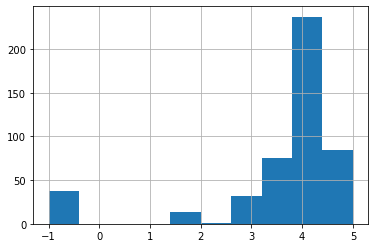

<AxesSubplot:>

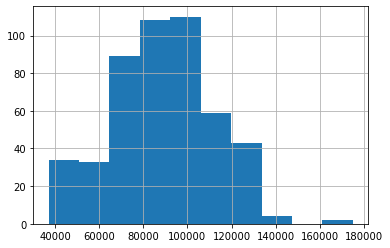

<AxesSubplot:>

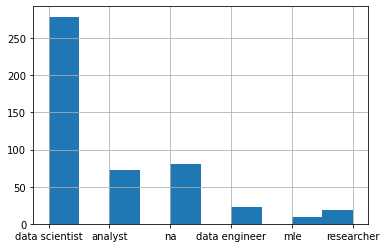

<AxesSubplot:>

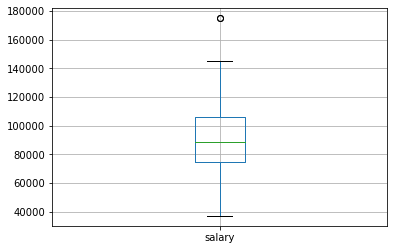